In [32]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: CE
Digite os 2 primeiros digitos do shapefile: 23


# Importando o shapefile

In [34]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13615 entries, 0 to 13614
Data columns (total 14 columns):
ID            13615 non-null int64
CD_GEOCODI    13615 non-null object
TIPO          13615 non-null object
CD_GEOCODB    6593 non-null object
NM_BAIRRO     6593 non-null object
CD_GEOCODS    13615 non-null object
NM_SUBDIST    3043 non-null object
CD_GEOCODD    13615 non-null object
NM_DISTRIT    13615 non-null object
CD_GEOCODM    13615 non-null object
NM_MUNICIP    13615 non-null object
NM_MICRO      13615 non-null object
NM_MESO       13615 non-null object
geometry      13615 non-null object
dtypes: int64(1), object(13)
memory usage: 1.5+ MB


In [35]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [36]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [37]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(13274, 13)

In [38]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,230010105000001,280.0,953.0,"3,4","2,82","571,69","316755,91","597,29","315645,49","343,83","232736,68","536,1","259862,14"
1,230010105000002,79.0,307.0,"3,89","2,49","274,99","53733,83","339,44","44303,55","152,45","41137,62","290,49","38266,06"
2,230010105000003,120.0,422.0,"3,52","2,71","645,36","656299,39","673,42","666023,25","351,59","345354,88","540,32","429127,31"
3,230010105000004,15.0,52.0,"3,47","3,12","213,67","86880,24","356,11","94973,61","190,63",61879,"301,83","64520,75"
4,230010105000005,84.0,332.0,"3,95","4,38","333,06","69879,6","417,57","52056,61","228,05","72817,5","369,64","65652,08"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [39]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [40]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [41]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 13274 entries, 0 to 13273
Data columns (total 26 columns):
ID            13274 non-null int64
CD_GEOCODI    13274 non-null int64
TIPO          13274 non-null object
CD_GEOCODB    6440 non-null object
NM_BAIRRO     6440 non-null object
CD_GEOCODS    13274 non-null object
NM_SUBDIST    3020 non-null object
CD_GEOCODD    13274 non-null object
NM_DISTRIT    13274 non-null object
CD_GEOCODM    13274 non-null object
NM_MUNICIP    13274 non-null object
NM_MICRO      13274 non-null object
NM_MESO       13274 non-null object
geometry      13274 non-null object
V001          13269 non-null float64
V002          13269 non-null float64
V003          13269 non-null object
V004          13269 non-null object
V005          13269 non-null object
V006          13269 non-null object
V007          13243 non-null object
V008          13243 non-null object
V009          13274 non-null object
V010          13274 non-null object
V011          13266 no

In [42]:
del gdf
del dados

Text(0.5,1,'CE')

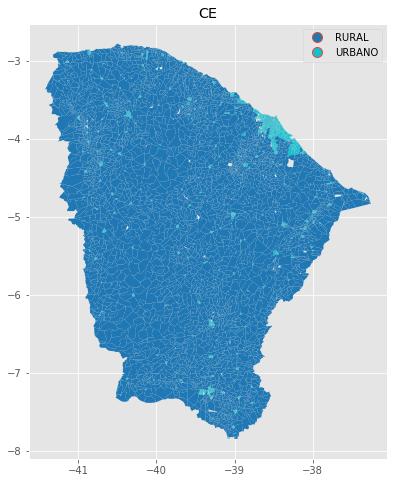

In [43]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [44]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [45]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [46]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [47]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [48]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
3734,PacujÃ¡,CE,1.220,2309904.0,POLYGON ((-40.70195044099238 -3.98242955742696...,1.220180
3779,ApuiarÃ©s,CE,1.419,2300903.0,(POLYGON ((-39.42787412348834 -3.9475055480005...,1.418745
4664,Milagres,CE,2.294,2308302.0,(POLYGON ((-38.94674598800583 -7.3043448768892...,2.293966
4709,Palhano,CE,1.795,2310001.0,(POLYGON ((-37.96576869645609 -4.7431070514368...,1.795307
4714,ArarendÃ¡,CE,2.222,2301257.0,(POLYGON ((-40.83429404821854 -4.7451272892493...,2.221722


In [49]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 184 entries, 3734 to 4947
Data columns (total 6 columns):
Municipio     184 non-null object
UF            184 non-null object
Area_Urb      184 non-null float64
CD_GEOCODM    184 non-null int64
geometry      184 non-null object
Area          184 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.1+ KB


In [50]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no CE')

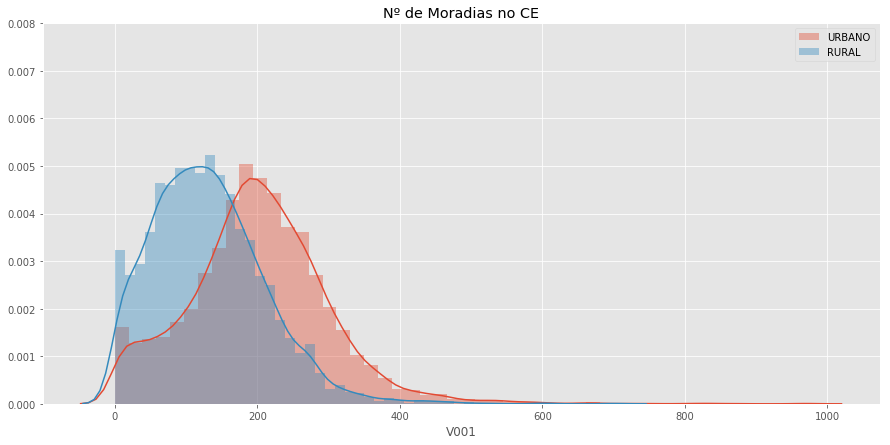

In [51]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [52]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    4246.000000
mean      130.895431
std        78.978522
min         0.000000
25%        73.000000
50%       124.000000
75%       178.000000
max       701.000000
Name: V001, dtype: float64
URBANO 
 count    9028.000000
mean      200.395769
std        98.398343
min         0.000000
25%       141.000000
50%       198.000000
75%       258.000000
max       972.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

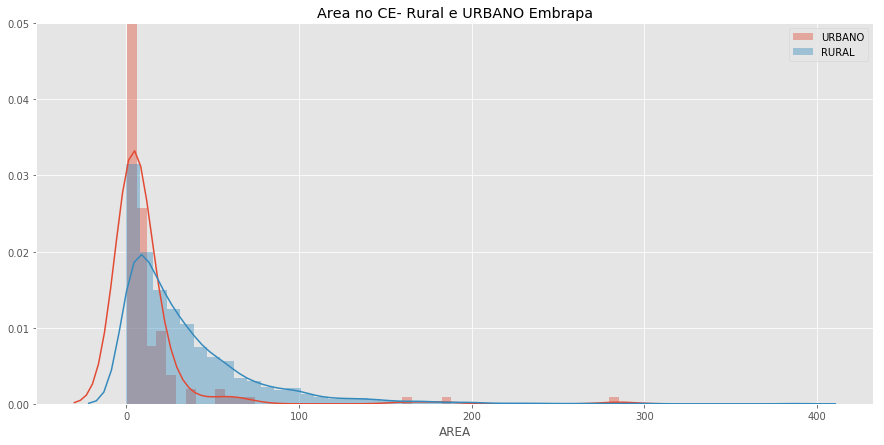

In [53]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [54]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

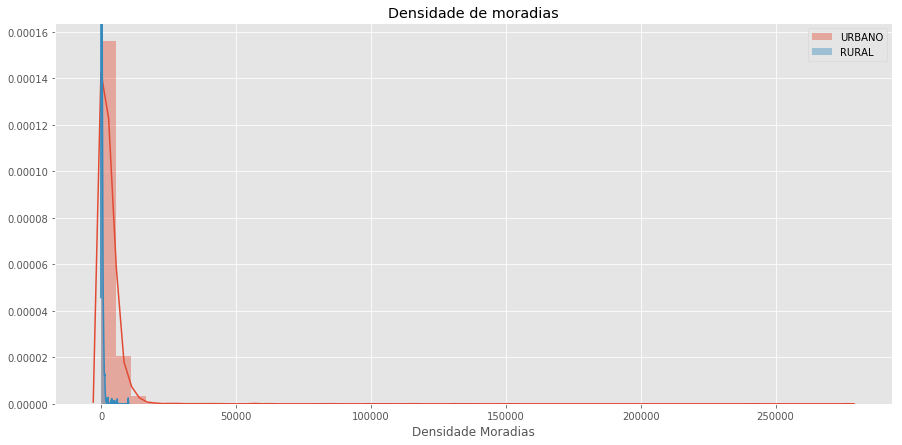

In [55]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [56]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    4246.000000
mean       62.312229
std       346.219234
min         0.000000
25%         2.314034
50%         4.713540
75%        13.018346
max      9975.327851
Name: Densidade Moradias, dtype: float64
URBANO 
 count      9028.000000
mean       2951.754643
std        6249.840932
min           0.000000
25%         472.571370
50%        1809.383445
75%        4112.277058
max      276131.062354
Name: Densidade Moradias, dtype: float64


In [57]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,108.000000,1.080000e+02,108.000000,108.000000,108.000000,108.000000
mean,16129.398148,2.306991e+14,141.398148,510.620370,0.153253,1403.621731
std,4446.193556,4.102446e+11,83.722722,306.240231,0.109392,1630.232959
min,8920.000000,2.300150e+14,20.000000,68.000000,0.005833,549.882949
25%,11419.750000,2.303709e+14,78.750000,271.500000,0.075747,678.117134
50%,16851.500000,2.306306e+14,122.500000,444.500000,0.125983,841.223520
75%,19799.750000,2.310308e+14,183.500000,643.250000,0.192664,1212.174560
max,22485.000000,2.314102e+14,393.000000,1483.000000,0.548239,9975.327851


## Descrição da área por setor censitários urbanos e rurais

In [58]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    184.000000
mean      10.753810
std       28.816534
min        0.275424
25%        2.001392
50%        3.709304
75%        7.137510
max      285.056339
Name: Area, dtype: float64
RURAL 
 count    4246.000000
mean       33.966248
std        38.567492
min         0.005833
25%         8.085850
50%        22.017087
75%        46.243287
max       388.718563
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

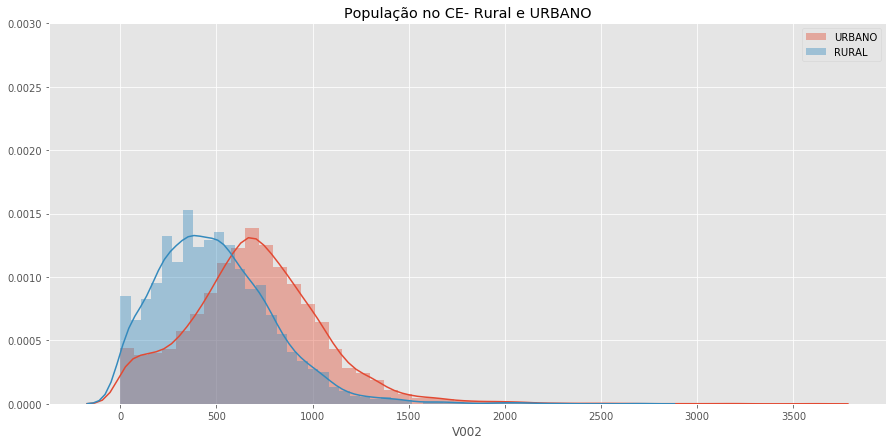

In [59]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [60]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    4246.000000
mean      494.477155
std       303.365185
min         0.000000
25%       271.000000
50%       462.000000
75%       671.000000
max      2711.000000
Name: V002, dtype: float64
URBANO 
 count    9028.000000
mean      700.831524
std       355.524632
min         0.000000
25%       479.000000
50%       688.500000
75%       903.000000
max      3611.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [61]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [62]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [63]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000
mean,13860.750000,2.305883e+14,323.000000,1175.000000,0.082300,4646.637045
std,4884.833629,4.347050e+11,47.251102,207.737013,0.052073,1591.198085
min,11416.000000,2.303709e+14,290.000000,1029.000000,0.051847,2457.641673
25%,11418.250000,2.303709e+14,298.250000,1071.000000,0.052491,3974.121894
50%,11419.500000,2.303709e+14,304.500000,1094.000000,0.058722,5142.586439
75%,13862.000000,2.305883e+14,329.250000,1198.000000,0.088531,5815.101591
max,21188.000000,2.312403e+14,393.000000,1483.000000,0.159909,5843.733629


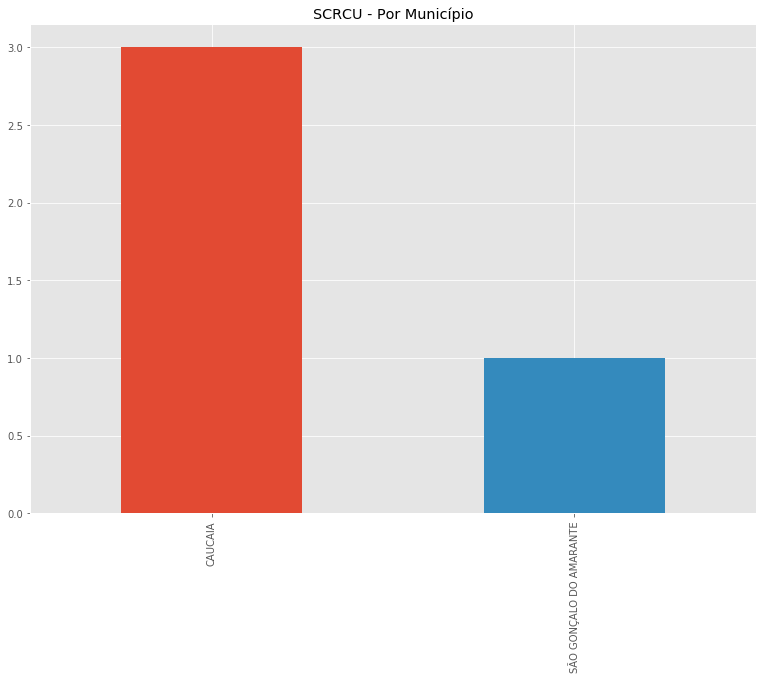

In [64]:
if scrcu['ID'].count()>0:
    plt.style.use('ggplot')
    scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
    plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


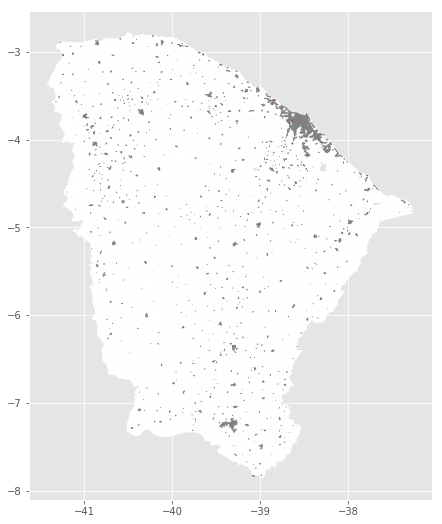

In [65]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [66]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [67]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [68]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [70]:
regioes_urbanas_df.head()

,geometry,FONTE
2465,"POLYGON ((-38.6285655663828 -3.78670055693874,...",1.0
2468,"POLYGON ((-38.6283496471459 -3.78604990585227,...",1.0
2469,"POLYGON ((-38.6316171523686 -3.78658513177605,...",1.0
12004,"POLYGON ((-38.8319220313506 -3.55447587265568,...",1.0
3734,POLYGON ((-40.70195044099238 -3.98242955742696...,0.0


In [71]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [72]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [73]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)